# **Checking The Overfitting**

- A model called Breast Cancer Classification model has been developed. The relevant engineer claims that the accuracy value of this model is 98 percent. However, the wrong predictions the model makes about our patients are causing trouble for our hospital :)

- Re-develop this model and interpret the results.

The model accuracy value we obtained in the logistic regression section was 98 percent. This situation made us think that we could fall into an over-learning problem. We may also be taking the sin of our engineer. We don't know.

For this reason, we need to develop a new model by taking over-learning precautions.

Re-model this dataset.

Things to note:

- Use the breast cancer dataset in sklearn. (from sklearn.datasets import load_breast_cancer)

- Operation can be done in the data pre-processing step. There is no need to write a function.

- Use the function we defined for the Tensorflow dataset and set the batch_size to 32.

- Create a simple model with 1 hidden layer. You can choose the number of neurons as you wish.

- Use appropriate layer structures and callback against over-learning problem.

- Use SGD directly in the model compile section, that is, use optimizer="SGD" in compile.

- Enter a small value in early stopping since we suspect overfitting.

- Comment on the best epoch result.

- Comment on the loss curve.

- The choice is left to you for the issues that are not expressed.

- General structures and directions for the path are left in the notebook.

In [2]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.4.1 Tensorflow Current Version: 2.16.1


In [ ]:
# !pip uninstall tf-keras

# !pip install tensorflow==2.16.1

# **Imports and Settings**

In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

random.seed(46)
np.random.seed(46)
tf.random.set_seed(46)

# **Functions**

In [5]:
def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'train_metric')
    plt.legend()
    plt.show()


def get_best_epoch_details(history):
    val_losses = history.history['val_loss']
    min_val_loss_index = val_losses.index(min(val_losses))
    best_epoch = min_val_loss_index + 1

    epoch_details = {}
    for key in history.history.keys():
        epoch_details[key] = history.history[key][min_val_loss_index]

    epoch_details['best_epoch'] = best_epoch
    return epoch_details

def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):

    if batch_size is None:
        batch_size = len(X_train)

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)

    return train_dataset, val_dataset


# **Data Preprocess, Train Validation and Tensorflow Dataset**

# **Task 1: Load the dataset and get X and y.**

# **Task 1 Solution**

In [6]:
data = load_breast_cancer()
X = data.data
y = data.target

# **Task 2: Differentiate Between Train Validation Sets**

# **Task 2 Solution**

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

# **Task 3: Pass X_train and X_val Sets Through the Standard Scaler**

# **Task 3 Solution**

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# **Task 4: Create Tensorflow Dataset**

# **Task 4 Solution**

In [9]:
train_ds, val_ds = prepare_datasets(X_train, X_val, y_train, y_val, batch_size=32)

# **Model**

# **Task 5: Create the Model Structure Using Appropriate Layers For Extreme Learning**

# **Task 5 Solution**

In [10]:
model = Sequential([
    Input(shape=(train_ds.element_spec[0].shape[1],)),
    Dense(50, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# **Task 6: Compile the Model With SGD, inary_crossentropy and Accuracy, AUC Values.**

# **Task 6 Solution**

In [11]:
model.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

# **Task 7: Define Early Stopping Callback.**

# **Task 7 Solution**

In [12]:
early_stoping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# **Task 8: Train the Model**

# **Task 8 Solution**

In [13]:
history = model.fit(train_ds, validation_data=val_ds, epochs=1000, callbacks=[early_stoping])

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - AUC: 0.7390 - accuracy: 0.6763 - loss: 0.7336 - val_AUC: 0.9591 - val_accuracy: 0.8070 - val_loss: 0.4783
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8991 - accuracy: 0.8260 - loss: 0.4535 - val_AUC: 0.9762 - val_accuracy: 0.9123 - val_loss: 0.3924
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9235 - accuracy: 0.8331 - loss: 0.4051 - val_AUC: 0.9815 - val_accuracy: 0.9474 - val_loss: 0.3343
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9604 - accuracy: 0.8868 - loss: 0.3170 - val_AUC: 0.9826 - val_accuracy: 0.9561 - val_loss: 0.2940
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9523 - accuracy: 0.8961 - loss: 0.3231 - val_AUC: 0.9842 - val_accuracy: 0.9649 - val_loss: 0.2622
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9818 - accuracy: 0.9390 - loss: 0.2260 - val_AUC: 0.9844 - val_accuracy: 0.9737 - val_loss: 0.2391
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━

# **Task 9: Get the Best Epoch Values ​​and Interpret Them.**

# **Task 9 Solution**

In [14]:
best_epoch_details = get_best_epoch_details(history)
print(f"Best Epoch Details: {best_epoch_details}")

Best Epoch Details: {'AUC': 0.9901621341705322, 'accuracy': 0.9560439586639404, 'loss': 0.1620844304561615, 'val_AUC': 0.9864267110824585, 'val_accuracy': 0.9824561476707458, 'val_loss': 0.13411486148834229, 'best_epoch': 52}


# **Task 10: Visualize and Interpret Train History**

# **Task 10 Solution**

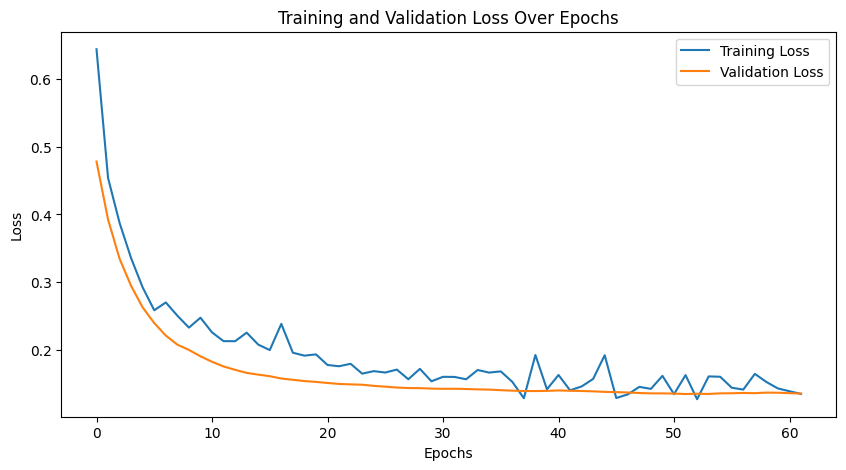

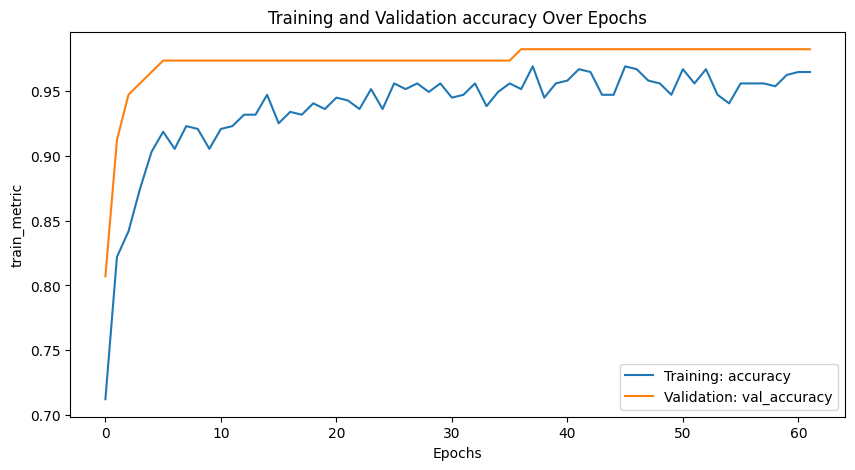

In [15]:
plot_training_history(history)

# **Task 11: What Do You Think About the Over-Learning Situation of the Model?**

# **Task 11 Solution**

The best epoch results obtained at the end of the model training process are as follows: **'AUC'**: 0.9901, **'accuracy'**: 0.9560, **'loss'**: 0.1620, **'val_AUC'**: 0.9864, **'val_accuracy'**: 0.9824, **'val_loss'**: 0.1341, and **'best_epoch'**: 52. As a result of the evaluation of the metrics monitored in each epoch, it was observed that the val loss value generally tended to decrease, while the val accuracy value tended to increase.

When the loss graph of the model is examined, it is seen that the training loss and validation loss values ​​follow a parallel course. This shows that the model does not overfit during training and maintains its general performance. **Therefore, the model provides good generalizability on new data other than training data.**

# **General Information**

## **1-) Train, Validation and Test Set**

When training a machine learning or deep learning model, it is a critical step to separate the data into three groups: training, validation, and testing. The training set is the data used in the model’s learning process. The model learns to recognize patterns and update its parameters with this data. The validation set is used to tune the model’s hyperparameters and is important for evaluating the model’s performance on new data. **During the training process, the model can prevent over-learning by looking at the validation set, such as early stopping.** The test set is used to evaluate the model’s final performance on independent data. Since this data has not been seen by the model before, it measures the model’s ability to generalize in the real world.

## **2-) Regularization**

**Regularization is a technique that helps prevent a model from over-fitting.** Over-fitting is when a model overfits the training data and therefore underperforms on new data. **Regularization works by limiting the size of the model’s weights or by disabling certain features (such as the L1 and L2 regularization methods).** This process helps keep the model simple, increasing its generalizability. Especially in deep learning, regularization techniques provide more balanced performance by reducing unnecessary parameters during model training.

## **3-) Dropout**

Dropout is a technique used in deep learning and was developed specifically to prevent over-learning. **During the training process, certain neurons are randomly disabled at each forward step.** **This forces some layers of the model to work with incomplete information and is not dependent on specific neurons or weights.** Dropout increases the diversity of the model by creating different subnetworks and improves overall performance. Turning off random neurons during training prevents the model from overfitting to certain features and provides better generalizability on new data.

## **4-) Batch Normalization**

**Batch Normalization is used to adjust the distribution of activations in each layer during the training of deep learning models.** This process normalizes the data with the mean and standard deviation after each mini-batch during the training process, allowing the model to learn faster and more stably. **Batch normalization allows for higher learning rates and generally prevents the model from overfitting.** In addition, training time is reduced and generalization ability is increased due to smoother updating of model parameters.

## **5-) Early Stopping**

**Early stopping is a technique used to prevent over-learning of the model. When there is no improvement in the model validation loss during training, the training process is terminated early.** In this way, the model is not trained for more epochs than necessary and the training is completed when the validation error reaches the lowest level. Early stopping reduces the training time, provides faster results and prevents unnecessary parameter updates. This method gives effective results especially when the validation set is used and increases the performance of the model on new data.

## **6-) Data Augmentation**

**Data augmentation is a technique used to diversify the training data.** Insufficient data can lead to over-learning of the model, so data augmentation helps the model undergo a more robust learning process by creating new examples from the existing data. Commonly used methods in image processing include rotation, scaling, cropping, color changes, etc. **Data augmentation increases the generalizability of the model by exposing it to different variations and enriches the diversity of the training data.**

## **7-) Hyperparameters**

Hyperparameters are parameters that are determined in advance during the training of the model and directly affect the training process and model performance. **Settings such as learning rate, epoch number, hidden layer number, dropout rate are examples of hyperparameters.** **Choosing these parameters correctly significantly affects the performance of the model.** Methods such as grid search or random search can be used to optimize hyperparameters. Correctly set hyperparameters increase the generalization capacity of the model and allow better results to be obtained.